In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [61]:
df  = pd.read_csv('dataset/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
df['Member_number'].value_counts()

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: count, Length: 3898, dtype: int64

In [5]:
df[df['Member_number'] == 3180]

,Member_number,Date,itemDescription
421,3180,15-03-2015,whole milk
1810,3180,04-05-2015,tropical fruit
2054,3180,06-02-2015,ham
4041,3180,19-10-2015,root vegetables
4482,3180,15-09-2015,bottled beer
5052,3180,19-10-2015,pastry
5467,3180,03-07-2015,sausage
7684,3180,03-07-2015,other vegetables
8034,3180,15-09-2015,tropical fruit
10056,3180,24-02-2014,citrus fruit


In [6]:
cnt = df.groupby('itemDescription').count()['Member_number'].sort_values(ascending=False)
cnt

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: Member_number, Length: 167, dtype: int64

In [7]:
df_cnt = cnt.reset_index()
df_cnt1= df_cnt[:10]
df_cnt1

,itemDescription,Member_number
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
5,root vegetables,1071
6,tropical fruit,1032
7,bottled water,933
8,sausage,924
9,citrus fruit,812


In [8]:
top_items = df_cnt1['itemDescription']
top_items = list(top_items)

In [9]:
df_cnt.shape

(167, 2)

Text(0.5, 0, 'items')

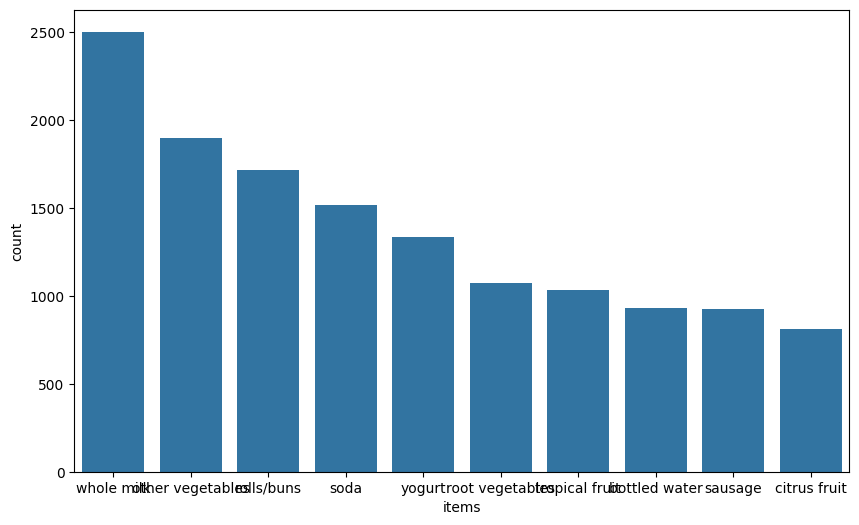

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_cnt1['itemDescription'],y=df_cnt1['Member_number'],data=df_cnt1)
plt.ylabel('count')
plt.xlabel('items')

In [11]:

def func(x):
    list = []
    list.append(x)
    return list
tmp = df['itemDescription'].apply(func)
tmp

0               [tropical fruit]
1                   [whole milk]
2                    [pip fruit]
3             [other vegetables]
4                   [whole milk]
                  ...           
38760            [sliced cheese]
38761                    [candy]
38762                 [cake bar]
38763    [fruit/vegetable juice]
38764                 [cat food]
Name: itemDescription, Length: 38765, dtype: object

In [12]:
df['itemDescription']

0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object

In [13]:
allitems = []
def func(x): 
    allitems.append(x)
df['itemDescription'].apply(func)

0        None
1        None
2        None
3        None
4        None
         ... 
38760    None
38761    None
38762    None
38763    None
38764    None
Name: itemDescription, Length: 38765, dtype: object

In [14]:
st = set(allitems)
allitems_list=list(st)
allitems_list

['hard cheese',
 'whipped/sour cream',
 'rubbing alcohol',
 'semi-finished bread',
 'flower soil/fertilizer',
 'instant coffee',
 'specialty cheese',
 'domestic eggs',
 'shopping bags',
 'pot plants',
 'curd',
 'frozen fruits',
 'syrup',
 'nut snack',
 'pudding powder',
 'roll products ',
 'coffee',
 'newspapers',
 'honey',
 'artif. sweetener',
 'abrasive cleaner',
 'tidbits',
 'house keeping products',
 'jam',
 'kitchen utensil',
 'curd cheese',
 'bags',
 'chocolate',
 'frozen meals',
 'frozen fish',
 'spread cheese',
 'salty snack',
 'waffles',
 'whisky',
 'liquor (appetizer)',
 'butter',
 'butter milk',
 'rolls/buns',
 'pet care',
 'specialty fat',
 'condensed milk',
 'male cosmetics',
 'napkins',
 'grapes',
 'mayonnaise',
 'zwieback',
 'misc. beverages',
 'red/blush wine',
 'yogurt',
 'finished products',
 'ice cream',
 'female sanitary products',
 'dog food',
 'cleaner',
 'Instant food products',
 'cling film/bags',
 'frozen dessert',
 'dish cleaner',
 'sausage',
 'detergent',
 'p

In [15]:
df['itemDescription'] = tmp
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,[tropical fruit]
1,2552,05-01-2015,[whole milk]
2,2300,19-09-2015,[pip fruit]
3,1187,12-12-2015,[other vegetables]
4,3037,01-02-2015,[whole milk]
...,...,...,...
38760,4471,08-10-2014,[sliced cheese]
38761,2022,23-02-2014,[candy]
38762,1097,16-04-2014,[cake bar]
38763,1510,03-12-2014,[fruit/vegetable juice]


In [16]:
ser = df.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)
ser

0        [sausage, whole milk, semi-finished bread, yog...
1                        [whole milk, pastry, salty snack]
2                           [canned beer, misc. beverages]
3                              [sausage, hygiene articles]
4                               [soda, pickled vegetables]
                               ...                        
14958    [tropical fruit, berries, other vegetables, yo...
14959                               [bottled water, herbs]
14960                      [fruit/vegetable juice, onions]
14961         [soda, root vegetables, semi-finished bread]
14962                     [bottled beer, other vegetables]
Name: itemDescription, Length: 14963, dtype: object

In [17]:
df = pd.DataFrame(ser)

In [18]:
df.shape

(14963, 1)

In [19]:
transactions = df['itemDescription'].tolist()

In [20]:
encoder = TransactionEncoder()
encoder.fit(transactions)
tmp1 = encoder.transform(transactions)
transformed_df = pd.DataFrame(tmp1,columns = encoder.columns_)


In [21]:
encoder.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [22]:
transformed_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
freq_itemset = apriori(transformed_df,min_support=6/transformed_df.shape[0],use_colnames=True)
freq_itemset

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
...,...,...
1966,0.000601,"(shopping bags, soda, whole milk)"
1967,0.000535,"(yogurt, shopping bags, whole milk)"
1968,0.000668,"(tropical fruit, soda, whole milk)"
1969,0.000936,"(yogurt, soda, whole milk)"


In [24]:
rules = association_rules(freq_itemset,metric='lift',min_threshold=1.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289,0.381761
1,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854,0.383247
2,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922,0.427761
3,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685,0.426767
4,(artif. sweetener),(soda),0.001938,0.097106,0.000468,0.241379,2.485725,0.000280,1.190178,0.598864
...,...,...,...,...,...,...,...,...,...,...
517,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
518,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
519,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307,0.521727
520,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596,0.454430


In [37]:
rules = rules.sort_values('confidence',ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,new_col
246,"(canned beer, hygiene articles)",(whole milk),0.000735,0.157923,0.000401,0.545455,3.453930,0.000285,1.852570,0.710997,"['canned beer', 'hygiene articles'] -> ['whole..."
258,"(chewing gum, soda)",(yogurt),0.001002,0.085879,0.000401,0.400000,4.657743,0.000315,1.523536,0.786092,"['chewing gum', 'soda'] -> ['yogurt']"
455,"(pork, sausage)",(whole milk),0.001537,0.157923,0.000601,0.391304,2.477819,0.000359,1.383412,0.597337,"['pork', 'sausage'] -> ['whole milk']"
190,"(bottled beer, beef)",(whole milk),0.001069,0.157923,0.000401,0.375000,2.374577,0.000232,1.347323,0.579492,"['bottled beer', 'beef'] -> ['whole milk']"
378,"(yogurt, onions)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,0.572079,"['yogurt', 'onions'] -> ['whole milk']"
...,...,...,...,...,...,...,...,...,...,...,...
59,(whole milk),(canned fruit),0.157923,0.001403,0.000401,0.002539,1.809201,0.000179,1.001139,0.531151,['whole milk'] -> ['canned fruit']
355,(whole milk),"(pip fruit, margarine)",0.157923,0.001270,0.000401,0.002539,1.999644,0.000200,1.001273,0.593664,"['whole milk'] -> ['pip fruit', 'margarine']"
251,(whole milk),"(canned beer, hygiene articles)",0.157923,0.000735,0.000401,0.002539,3.453930,0.000285,1.001809,0.843717,"['whole milk'] -> ['canned beer', 'hygiene art..."
245,(whole milk),"(canned beer, citrus fruit)",0.157923,0.001537,0.000401,0.002539,1.651880,0.000158,1.001005,0.468638,"['whole milk'] -> ['canned beer', 'citrus fruit']"


In [26]:
def concat(row):
    return "{} -> {}".format(list(row['antecedents']), list(row['consequents']))
rules['new_col'] = rules.apply(concat,axis=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,new_col
260,"(yogurt, soda)",(chewing gum),0.005814,0.012030,0.000401,0.068966,5.732950,0.000331,1.061153,0.830398,"['yogurt', 'soda'] -> ['chewing gum']"
261,(chewing gum),"(yogurt, soda)",0.012030,0.005814,0.000401,0.033333,5.732950,0.000331,1.028468,0.835622,"['chewing gum'] -> ['yogurt', 'soda']"
248,"(hygiene articles, whole milk)",(canned beer),0.001738,0.046916,0.000401,0.230769,4.918803,0.000319,1.239010,0.798085,"['hygiene articles', 'whole milk'] -> ['canned..."
249,(canned beer),"(hygiene articles, whole milk)",0.046916,0.001738,0.000401,0.008547,4.918803,0.000319,1.006868,0.835916,"['canned beer'] -> ['hygiene articles', 'whole..."
247,"(canned beer, whole milk)",(hygiene articles),0.006015,0.013700,0.000401,0.066667,4.866016,0.000319,1.056750,0.799301,"['canned beer', 'whole milk'] -> ['hygiene art..."
...,...,...,...,...,...,...,...,...,...,...,...
42,(candles),(sausage),0.004411,0.060349,0.000401,0.090909,1.506393,0.000135,1.033616,0.337652,['candles'] -> ['sausage']
412,"(other vegetables, whole milk)",(white bread),0.014837,0.023993,0.000535,0.036036,1.501970,0.000179,1.012494,0.339241,"['other vegetables', 'whole milk'] -> ['white ..."
413,(white bread),"(other vegetables, whole milk)",0.023993,0.014837,0.000535,0.022284,1.501970,0.000179,1.007617,0.342423,"['white bread'] -> ['other vegetables', 'whole..."
414,"(rolls/buns, pastry)",(tropical fruit),0.003943,0.067767,0.000401,0.101695,1.500652,0.000134,1.037769,0.334944,"['rolls/buns', 'pastry'] -> ['tropical fruit']"


In [38]:
top_rules = rules.iloc[0:10,:]
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,new_col
246,"(canned beer, hygiene articles)",(whole milk),0.000735,0.157923,0.000401,0.545455,3.453930,0.000285,1.852570,0.710997,"['canned beer', 'hygiene articles'] -> ['whole..."
258,"(chewing gum, soda)",(yogurt),0.001002,0.085879,0.000401,0.400000,4.657743,0.000315,1.523536,0.786092,"['chewing gum', 'soda'] -> ['yogurt']"
455,"(pork, sausage)",(whole milk),0.001537,0.157923,0.000601,0.391304,2.477819,0.000359,1.383412,0.597337,"['pork', 'sausage'] -> ['whole milk']"
190,"(bottled beer, beef)",(whole milk),0.001069,0.157923,0.000401,0.375000,2.374577,0.000232,1.347323,0.579492,"['bottled beer', 'beef'] -> ['whole milk']"
378,"(yogurt, onions)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,0.572079,"['yogurt', 'onions'] -> ['whole milk']"
402,"(other vegetables, sugar)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,0.572079,"['other vegetables', 'sugar'] -> ['whole milk']"
238,"(canned beer, chicken)",(whole milk),0.001136,0.157923,0.000401,0.352941,2.234896,0.000222,1.301392,0.553180,"['canned beer', 'chicken'] -> ['whole milk']"
272,"(pork, citrus fruit)",(other vegetables),0.001337,0.122101,0.000468,0.350000,2.866475,0.000305,1.350614,0.652011,"['pork', 'citrus fruit'] -> ['other vegetables']"
24,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,0.539750,['brandy'] -> ['whole milk']
202,"(beef, whipped/sour cream)",(whole milk),0.001403,0.157923,0.000468,0.333333,2.110735,0.000246,1.263116,0.526971,"['beef', 'whipped/sour cream'] -> ['whole milk']"


In [51]:
top_rules_lift = rules
top_rules_lift = top_rules_lift.sort_values('lift',ascending=False)

In [54]:
top_rules_lift = top_rules_lift.iloc[:10,:]

<Axes: xlabel='lift', ylabel='new_col'>

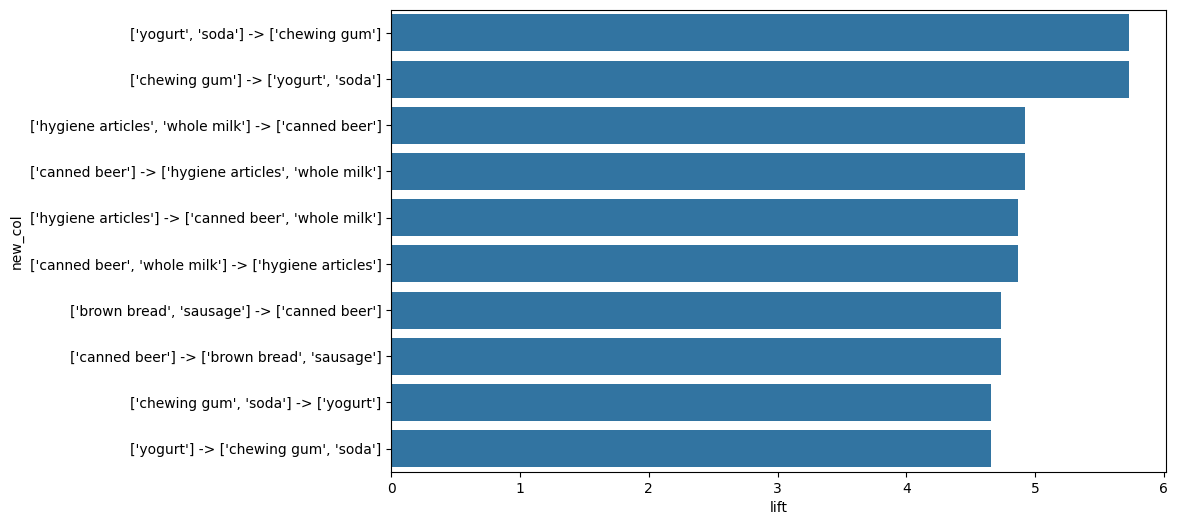

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_rules_lift['new_col'],x=top_rules_lift['lift'],data = top_rules_lift)

In [40]:
top_rules1 = rules[rules['confidence'] > 0.3]
top_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,new_col
246,"(canned beer, hygiene articles)",(whole milk),0.000735,0.157923,0.000401,0.545455,3.453930,0.000285,1.852570,0.710997,"['canned beer', 'hygiene articles'] -> ['whole..."
258,"(chewing gum, soda)",(yogurt),0.001002,0.085879,0.000401,0.400000,4.657743,0.000315,1.523536,0.786092,"['chewing gum', 'soda'] -> ['yogurt']"
455,"(pork, sausage)",(whole milk),0.001537,0.157923,0.000601,0.391304,2.477819,0.000359,1.383412,0.597337,"['pork', 'sausage'] -> ['whole milk']"
190,"(bottled beer, beef)",(whole milk),0.001069,0.157923,0.000401,0.375000,2.374577,0.000232,1.347323,0.579492,"['bottled beer', 'beef'] -> ['whole milk']"
378,"(yogurt, onions)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,0.572079,"['yogurt', 'onions'] -> ['whole milk']"
402,"(other vegetables, sugar)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,0.572079,"['other vegetables', 'sugar'] -> ['whole milk']"
238,"(canned beer, chicken)",(whole milk),0.001136,0.157923,0.000401,0.352941,2.234896,0.000222,1.301392,0.553180,"['canned beer', 'chicken'] -> ['whole milk']"
272,"(pork, citrus fruit)",(other vegetables),0.001337,0.122101,0.000468,0.350000,2.866475,0.000305,1.350614,0.652011,"['pork', 'citrus fruit'] -> ['other vegetables']"
24,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,0.539750,['brandy'] -> ['whole milk']
202,"(beef, whipped/sour cream)",(whole milk),0.001403,0.157923,0.000468,0.333333,2.110735,0.000246,1.263116,0.526971,"['beef', 'whipped/sour cream'] -> ['whole milk']"


<Axes: xlabel='confidence', ylabel='new_col'>

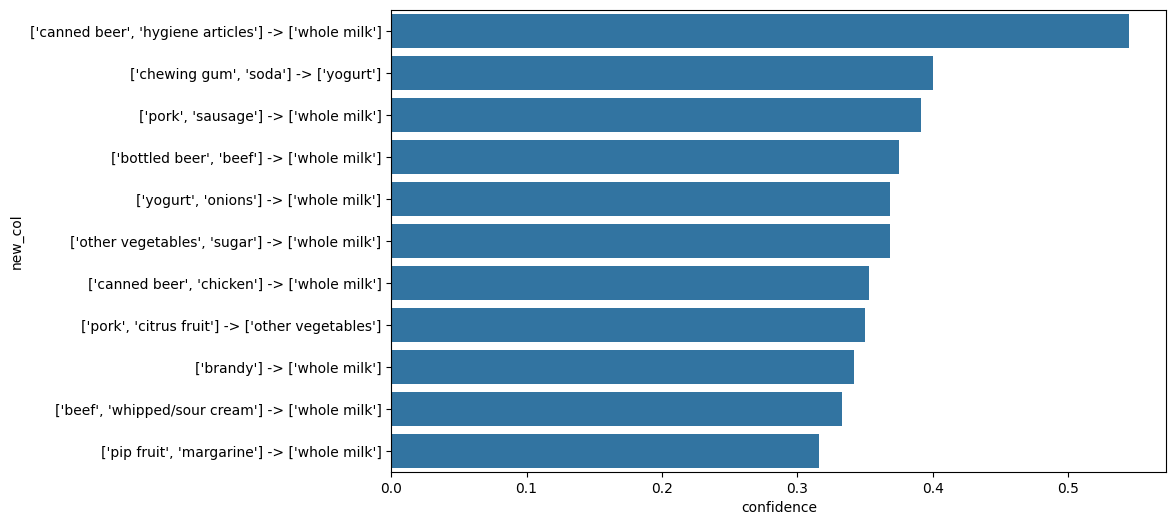

In [41]:
plt.figure(figsize=(10,6))
top_rules1 = top_rules1.sort_values('confidence',ascending=False)
sns.barplot(y=top_rules1['new_col'],x=top_rules1['confidence'],data = top_rules1)

In [32]:
top_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,new_col
246,"(canned beer, hygiene articles)",(whole milk),0.000735,0.157923,0.000401,0.545455,3.453930,0.000285,1.852570,0.710997,"['canned beer', 'hygiene articles'] -> ['whole..."
258,"(chewing gum, soda)",(yogurt),0.001002,0.085879,0.000401,0.400000,4.657743,0.000315,1.523536,0.786092,"['chewing gum', 'soda'] -> ['yogurt']"
455,"(pork, sausage)",(whole milk),0.001537,0.157923,0.000601,0.391304,2.477819,0.000359,1.383412,0.597337,"['pork', 'sausage'] -> ['whole milk']"
190,"(bottled beer, beef)",(whole milk),0.001069,0.157923,0.000401,0.375000,2.374577,0.000232,1.347323,0.579492,"['bottled beer', 'beef'] -> ['whole milk']"
378,"(yogurt, onions)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,0.572079,"['yogurt', 'onions'] -> ['whole milk']"
402,"(other vegetables, sugar)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,0.572079,"['other vegetables', 'sugar'] -> ['whole milk']"
238,"(canned beer, chicken)",(whole milk),0.001136,0.157923,0.000401,0.352941,2.234896,0.000222,1.301392,0.553180,"['canned beer', 'chicken'] -> ['whole milk']"
272,"(pork, citrus fruit)",(other vegetables),0.001337,0.122101,0.000468,0.350000,2.866475,0.000305,1.350614,0.652011,"['pork', 'citrus fruit'] -> ['other vegetables']"
24,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,0.539750,['brandy'] -> ['whole milk']
202,"(beef, whipped/sour cream)",(whole milk),0.001403,0.157923,0.000468,0.333333,2.110735,0.000246,1.263116,0.526971,"['beef', 'whipped/sour cream'] -> ['whole milk']"


In [42]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,new_col
246,"(canned beer, hygiene articles)",(whole milk),0.000735,0.157923,0.000401,0.545455,3.453930,0.000285,1.852570,0.710997,"['canned beer', 'hygiene articles'] -> ['whole..."
258,"(chewing gum, soda)",(yogurt),0.001002,0.085879,0.000401,0.400000,4.657743,0.000315,1.523536,0.786092,"['chewing gum', 'soda'] -> ['yogurt']"
455,"(pork, sausage)",(whole milk),0.001537,0.157923,0.000601,0.391304,2.477819,0.000359,1.383412,0.597337,"['pork', 'sausage'] -> ['whole milk']"
190,"(bottled beer, beef)",(whole milk),0.001069,0.157923,0.000401,0.375000,2.374577,0.000232,1.347323,0.579492,"['bottled beer', 'beef'] -> ['whole milk']"
378,"(yogurt, onions)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,0.572079,"['yogurt', 'onions'] -> ['whole milk']"
...,...,...,...,...,...,...,...,...,...,...,...
59,(whole milk),(canned fruit),0.157923,0.001403,0.000401,0.002539,1.809201,0.000179,1.001139,0.531151,['whole milk'] -> ['canned fruit']
355,(whole milk),"(pip fruit, margarine)",0.157923,0.001270,0.000401,0.002539,1.999644,0.000200,1.001273,0.593664,"['whole milk'] -> ['pip fruit', 'margarine']"
251,(whole milk),"(canned beer, hygiene articles)",0.157923,0.000735,0.000401,0.002539,3.453930,0.000285,1.001809,0.843717,"['whole milk'] -> ['canned beer', 'hygiene art..."
245,(whole milk),"(canned beer, citrus fruit)",0.157923,0.001537,0.000401,0.002539,1.651880,0.000158,1.001005,0.468638,"['whole milk'] -> ['canned beer', 'citrus fruit']"


In [34]:
class predictClass:
  def __init__(self,ruless):
      self.ruless=ruless
  def predict(self,cart):
    rules =  self.ruless
    recommend = []
    for ind,row in rules.iterrows():
        antecedents = set(row['antecedents'])
        consequents = set(row['consequents'])
        # print(antecedents)
        if antecedents.issubset(cart):
            recommend.append({
                'items':consequents,
                'confidence':row['confidence'],
                'lift':row['lift']
            })
    result = pd.DataFrame(recommend)
    result.sort_values('confidence',ascending=False)
    suggested = []
    for ind,row in result.iterrows():
      if row['lift'] > 1.5:
        suggested = row['items']
        break
    return list(suggested)

In [43]:
obj = predictClass(rules)

In [44]:
pred = obj.predict({'chewing gum','soda'})

In [45]:
print("Recommended items: ")
print(pred)

Recommended items: 
['yogurt']


In [47]:
import pickle

In [48]:
pickle.dump(rules,open('rules.pkl','wb'))

In [ ]:
rules

In [ ]:
pickle.dump(obj,open('prediction.pkl','wb'))

In [ ]:
pickle.dump(allitems_list,open('all_items.pkl','wb'))

In [ ]:
pickle.dump(top_items,open('top_items.pkl','wb'))